### Here we analyze and plot the HMC chains

In [1015]:
%pylab inline
name_str = 'TNG'
name_str2 = 'TNG' # only used for initial plots
name_str3 = 'WrongYield' # only used for initial plots
dat=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG/chains/%s_HMC_Full_v5_n200.npz'%name_str)
dat2=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG/chains/%s_HMC_Full_v5_n200.npz'%name_str2)
dat3=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG/chains/%s_HMC_Full_v5_n200.npz'%name_str3)

Populating the interactive namespace from numpy and matplotlib


In [1016]:
all_Lambdas = dat.f.Lambdas

In [1011]:
for this_n in [1,10,100,200]:
    ind = np.where(this_n==n_stars)[0][0]
    this_Lambdas = all_Lambdas[ind]
    medians = np.asarray([np.median(thisL,axis=0) for thisL in this_Lambdas])
    lows = np.asarray([np.percentile(thisL,15.865,axis=0) for thisL in this_Lambdas])
    highs = np.asarray([np.percentile(thisL,100.-15.865,axis=0) for thisL in this_Lambdas])
    for i in range(2):
        med = np.median(medians[:,i])
        up = np.median(highs[:,i])
        lo = np.median(lows[:,i])
        up2 = np.percentile(medians[:,i],100.-15.865)
        lo2 = np.percentile(medians[:,i],15.865)
        if i==0:
            print("$%d$ &"%this_n)
        print(" $%.2f$ & $^{+%.2f}_{-%.2f}$ & $^{+%.2f}_{-%.2f}$"%(med,up-med,med-lo,up2-med,med-lo2))
        if i==1:
            print(" \\\\")
        else:
            print("&")

$1$ &
 $-2.25$ & $^{+0.11}_{-0.09}$ & $^{+0.09}_{-0.07}$
&
 $-3.01$ & $^{+0.15}_{-0.15}$ & $^{+0.13}_{-0.11}$
 \\
$10$ &
 $-2.21$ & $^{+0.04}_{-0.04}$ & $^{+0.04}_{-0.05}$
&
 $-2.96$ & $^{+0.08}_{-0.08}$ & $^{+0.05}_{-0.08}$
 \\
$100$ &
 $-2.22$ & $^{+0.02}_{-0.02}$ & $^{+0.01}_{-0.01}$
&
 $-2.96$ & $^{+0.03}_{-0.02}$ & $^{+0.00}_{-0.00}$
 \\
$200$ &
 $-2.22$ & $^{+0.01}_{-0.01}$ & $^{+0.00}_{-0.00}$
&
 $-2.96$ & $^{+0.02}_{-0.02}$ & $^{+0.00}_{-0.00}$
 \\


In [784]:
n_stars = dat.f.n_stars

In [785]:
std_times=[]
mean_times=[]
all_runtimes=dat.f.runtimes
for i in range(len(all_runtimes)):
    std_times.append(np.std(all_runtimes[i]))
    mean_times.append(np.mean(all_runtimes[i]))

In [786]:
std_times2=[]
mean_times2=[]
all_runtimes2=dat2.f.runtimes
for i in range(len(all_runtimes2)):
    std_times2.append(np.std(all_runtimes2[i]))
    mean_times2.append(np.mean(all_runtimes2[i]))

In [787]:
std_times3=[]
mean_times3=[]
all_runtimes3=dat3.f.runtimes
for i in range(len(all_runtimes3)):
    std_times3.append(np.std(all_runtimes3[i]))
    mean_times3.append(np.mean(all_runtimes3[i]))

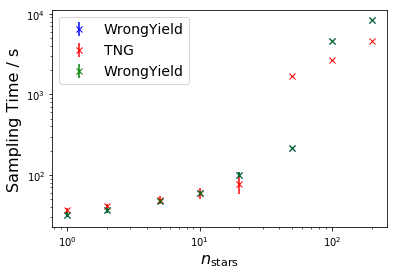

In [788]:
plt.errorbar(n_stars,mean_times,std_times,marker='x',ls='',label=r'%s'%name_str,c='b')
plt.errorbar(n_stars,mean_times2,std_times2,marker='x',ls='',label=r'%s'%name_str2,c='r')
plt.errorbar(n_stars,mean_times3,std_times3,marker='x',ls='',label=r'%s'%name_str3,c='g')
plt.xlabel(r'$n_\mathrm{stars}$',fontsize=16);plt.ylabel('Sampling Time / s',fontsize=16);
plt.legend(fontsize=14);
plt.xscale('log');plt.yscale('log');

### Plot Global Parameters

In [975]:
true=[-2.3,-2.89]

In [976]:
all_Lambdas = dat.f.Lambdas

In [977]:
for this_n in [1,10,100,200]:
    ind = np.where(this_n==n_stars)[0][0]
    this_Lambdas = all_Lambdas[ind]
    medians = np.asarray([np.median(thisL,axis=0) for thisL in this_Lambdas])
    lows = np.asarray([np.percentile(thisL,15.865,axis=0) for thisL in this_Lambdas])
    highs = np.asarray([np.percentile(thisL,100.-15.865,axis=0) for thisL in this_Lambdas])
    for i in range(2):
        med = np.median(medians[:,i])
        up = np.median(highs[:,i])
        lo = np.median(lows[:,i])
        up2 = np.percentile(medians[:,i],100.-15.865)
        lo2 = np.percentile(medians[:,i],15.865)
        if i==0:
            print("$%d$ &"%this_n)
        print(" $%.2f$ & $^{+%.2f}_{-%.2f}$ & $^{+%.2f}_{-%.2f}$"%(med,up-med,med-lo,up2-med,med-lo2))
        if i==1:
            print(" \\\\")
        else:
            print("&")

$1$ &
 $-2.27$ & $^{+0.08}_{-0.08}$ & $^{+0.15}_{-0.12}$
&
 $-2.86$ & $^{+0.11}_{-0.11}$ & $^{+0.11}_{-0.11}$
 \\
$10$ &
 $-2.27$ & $^{+0.03}_{-0.03}$ & $^{+0.03}_{-0.03}$
&
 $-2.87$ & $^{+0.03}_{-0.04}$ & $^{+0.02}_{-0.02}$
 \\
$100$ &
 $-2.28$ & $^{+0.01}_{-0.01}$ & $^{+0.01}_{-0.01}$
&
 $-2.89$ & $^{+0.01}_{-0.01}$ & $^{+0.00}_{-0.00}$
 \\
$200$ &
 $-2.28$ & $^{+0.01}_{-0.01}$ & $^{+0.00}_{-0.00}$
&
 $-2.89$ & $^{+0.01}_{-0.01}$ & $^{+0.00}_{-0.00}$
 \\


In [978]:
# meds = [[np.median(this_L,axis=0) for this_L in all_L] for all_L in all_Lambdas]
# sds = [[np.std(this_L,axis=0) for this_L in all_L] for all_L in all_Lambdas]

# mean_meds = np.asarray([np.mean(np.asarray(med)[:,1]) for med in meds])
# std_meds = np.asarray([np.std(np.asarray(med)[:,1]) for med in meds])
# mean_sds = np.asarray([np.mean(np.asarray(sd)[:,1]) for sd in sds])

# plt.scatter(n_stars,-std_meds/mean_meds,label=r'Sample-Size');
# plt.scatter(n_stars,-mean_sds/mean_meds,label=r'Statistical');
# #plt.xlim([0,50])
# plt.xscale('log');
# plt.legend();
# plt.ylabel('Fractional Error');

Compute distance from true value for each data-point

In [979]:
#dis = [[(np.mean(val,axis=0)-true)/np.std(val,axis=0) for val in datset] for datset in all_Lambdas]
dis = [[(np.mean(val,axis=0)-true)/true*100 for val in datset] for datset in all_Lambdas]

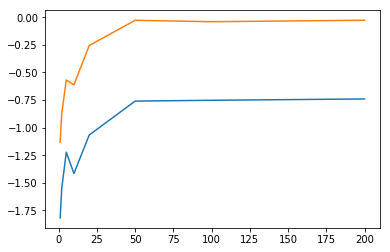

In [980]:
plt.plot(n_stars,[np.mean(np.asarray(d)[:,0]) for d in dis])
plt.plot(n_stars,[np.mean(np.asarray(d)[:,1]) for d in dis])

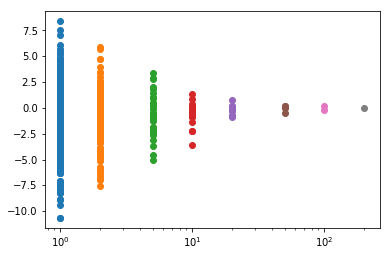

In [981]:
plt.figure()
for n_i,n in enumerate(n_stars):
    this_dat = dis[n_i]
    plt.scatter(n*np.ones(len(this_dat)),np.asarray(this_dat)[:,1])
plt.xscale('log')

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left

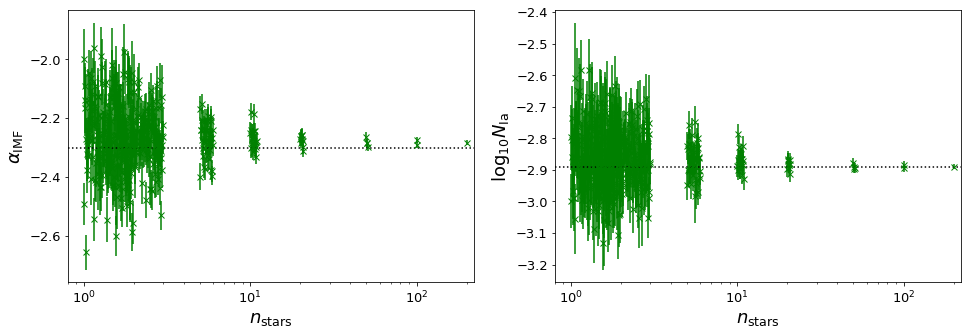

In [899]:
all_Lambdas = dat.f.Lambdas
labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']
FS=16
vmin,vmax=0.8,220
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,5));

for ind in [0,1]:
    ax[ind].set_xscale('log')
    for i in range(len(all_Lambdas)):
        for j in range(len(all_Lambdas[i])):
            lo,med,up = np.percentile(all_Lambdas[i][j][:,ind],[15.865,50.,84.135])
            ax[ind].errorbar(n_stars[i]*(1.+0.005*j),med,c='g',
                             yerr=np.asarray([med-lo,up-med]).reshape(1,2),marker='x')
    
    ax[ind].set_ylabel(labels[ind],fontsize=FS+2)
    ax[ind].set_xlabel(r'$n_\mathrm{stars}$',fontsize=FS+2)
    ax[ind].set_xscale('log');
    for label in (ax[ind].get_xticklabels()+ax[ind].get_yticklabels()):
        label.set_fontsize(fontsize=FS-3)
    
    ax[ind].hlines(true[ind],vmin,vmax,linestyles=':')
    ax[ind].set_xlim([vmin,vmax]);
    

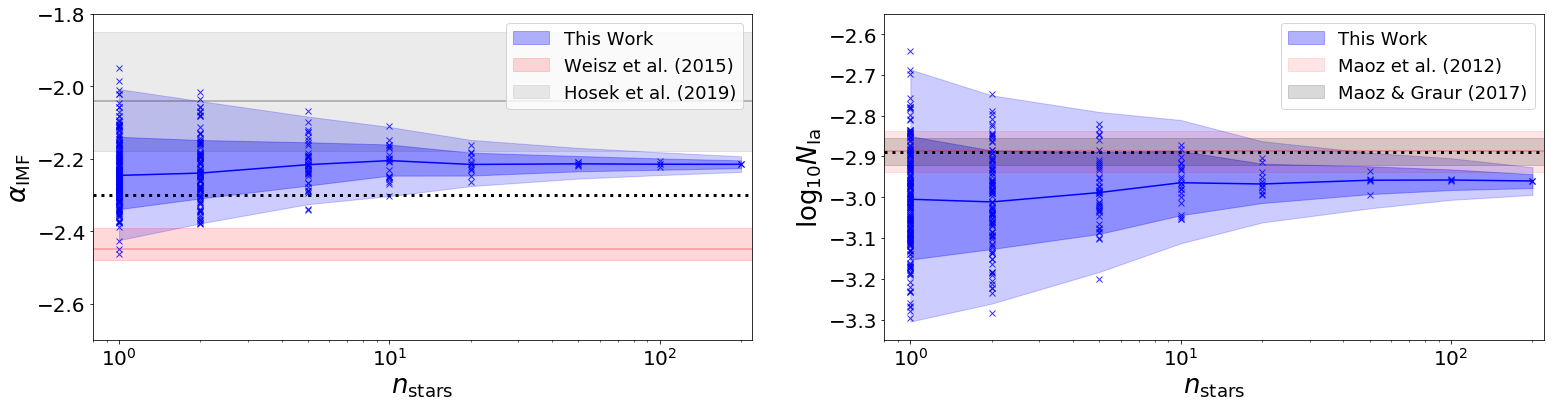

In [970]:
labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(26,6));

all_Lambdas = dat.f.Lambdas

med,lo,up,lo2,up2,sample_lo,sample_hi=[np.zeros((len(n_stars),2)) for _ in range(7)]
for i in range(len(n_stars)):
    theseL=all_Lambdas[i]
    lowL2,lowL,medianL,upL,upL2 = [[np.percentile(L,p,axis=0) for L in theseL] for p in [2.275,15.865,50.,84.135,97.725]]
    up[i]=np.median(upL,axis=0)
    lo[i]=np.median(lowL,axis=0)
    up2[i]=np.median(upL2,axis=0)
    lo2[i]=np.median(lowL2,axis=0)
    med[i]=np.median(medianL,axis=0)
    sample_lo[i],sample_hi[i]=np.percentile(medianL,[15.865,84.135],axis=0)

FS=22
    
for ind in [0,1]:
    ax[ind].set_xscale('log')
    ax[ind].errorbar(n_stars,med[:,ind],yerr=0.,#[med[:,ind]-sample_lo[:,ind],sample_hi[:,ind]-med[:,ind]],
                     marker='x',c='b')
    ax[ind].fill_between(n_stars,lo[:,ind],up[:,ind],alpha=0.3,color='b',label='This Work')
    ax[ind].fill_between(n_stars,lo2[:,ind],up2[:,ind],alpha=0.2,color='b')

    for i in range(len(n_stars)):
        for j in range(len(all_Lambdas[i])):
            ax[ind].errorbar(n_stars[i],np.median(all_Lambdas[i][j],axis=0)[ind],marker='x',c='b',alpha=0.8)

    ax[ind].set_ylabel(labels[ind],fontsize=FS+4)    
    ax[ind].set_xlabel(r'$n_\mathrm{stars}$',fontsize=FS+4)
    ax[ind].set_xscale('log');
    for label in (ax[ind].get_xticklabels()+ax[ind].get_yticklabels()):
        label.set_fontsize(fontsize=FS-2)

    ax[ind].hlines(true[ind],vmin,vmax,linestyles=':',lw=3)
    ax[ind].set_xlim([vmin,vmax]);

ax[0].set_ylim([-2.7,-1.8])
ax[1].set_ylim([-3.35,-2.55])
x_ar = np.arange(0,300)
y_ar = np.ones_like(x_ar)
ax[0].fill_between(x_ar,y_ar*-2.48,y_ar*-2.39,color='r',alpha=0.15,label='Weisz et al. (2015)')
ax[0].hlines(-2.45,0.1,300,color='r',alpha=0.3)

ax[0].fill_between(x_ar,y_ar*-(2.04+0.14),y_ar*-(2.04-0.19),color='k',alpha=0.08,label='Hosek et al. (2019)')
ax[0].hlines(-2.04,0.1,300,color='k',alpha=0.3)
ax[0].legend(fontsize=18)


ax[1].fill_between(x_ar,y_ar*np.log10(0.0013-0.00015),y_ar*np.log10(0.0013+0.00015),color='r',alpha=0.1,label='Maoz et al. (2012)')
ax[1].hlines(np.log10(0.0013),0.1,300,color='r',alpha=0.3)

ax[1].fill_between(x_ar,y_ar*np.log10(0.0013-0.00010),y_ar*np.log10(0.0013+0.00010),color='k',alpha=0.15,label='Maoz & Graur (2017)')
ax[1].hlines(np.log10(0.013),0.1,300,color='k',alpha=0.3)
ax[1].legend(fontsize=18)

In [971]:
fig.savefig('/home/oliverphilcox/ChempyMulti/Plots_New/%s_HMC_v5.pdf'%name_str,bbox_inches='tight')

### Look at element errors

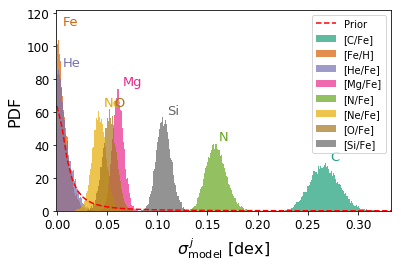

In [799]:
all_Errs=dat.f.Errors

n_index = np.where(n_stars==200)[0][0]
els = ['C','Fe','He','Mg','N','Ne','O','Si'] # TNG elements
these_Errs=all_Errs[n_index][0]
#these_Errs=np.concatenate(all_Errs[n_index],axis=0)

from scipy.stats import halfcauchy
xx = np.linspace(0,0.5,100)
yy = halfcauchy.pdf(xx,scale=0.01)

names = []
for el in els:
    if el!='Fe':
        names.append('[%s/Fe]'%el)
    else:
        names.append('[Fe/H]')

plt.figure(figsize=(6,3.7))
all_y=[]
all_x=[]
for el in range(8):
    col = plt.cm.Dark2(el/8)
    x,y,_=plt.hist(these_Errs[:,el],bins=100,alpha=0.7,color=col,density=True,label=names[el]);
    loc = np.argmax(x)
    if name_str!='Chempy':
        plt.text(y[loc]+0.005,max(x)+2,'%s'%els[el],color=col,size=13)
    all_y.append(y)
    all_x.append(x)
plt.plot(xx,yy,c='r',ls='--',label=r'Prior')
plt.xlim([-0.001,np.concatenate(all_y).max()])
plt.ylim([0,np.concatenate(all_x).max()*1.1]);
plt.legend();
for label in (plt.gca().get_xticklabels()+plt.gca().get_yticklabels()):
        label.set_fontsize(fontsize=12)

plt.ylabel(r'PDF',fontsize=16)
plt.xlabel(r'$\sigma_\mathrm{model}^{\,j}$ [dex]',fontsize=16);
plt.savefig('/home/oliverphilcox/ChempyMulti/Plots_New/%s_ModelErrorPlot.pdf'%name_str,bbox_inches='tight')

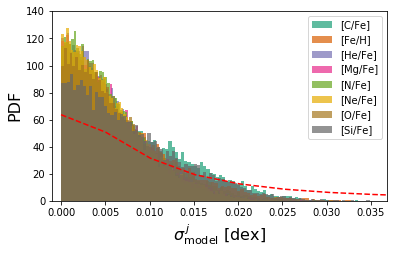

In [778]:
plt.figure(figsize=(6,3.5))
all_y=[]
all_x=[]
for el in range(8):
    col = plt.cm.Dark2(el/8)
    x,y,_=plt.hist(these_Errs[:,el],bins=100,alpha=0.7,color=col,density=True,label=names[el]);
    loc = np.argmax(x)
    if name_str!='Chempy':
        plt.text(y[loc]+0.005,max(x)+2,'%s'%els[el],color=col,size=12)
    all_y.append(y)
    all_x.append(x)
plt.plot(xx,yy,c='r',ls='--')
plt.xlim([-0.001,np.concatenate(all_y).max()])
plt.ylim([0,np.concatenate(all_x).max()*1.1]);
plt.legend();
plt.ylabel(r'PDF',fontsize=16)
plt.xlabel(r'$\sigma_\mathrm{model}^{\,j}$ [dex]',fontsize=16);
plt.savefig('/home/oliverphilcox/ChempyMulti/Plots_New/%s_ModelErrorPlot.pdf'%name_str,bbox_inches='tight')

In [547]:
err_sds = [np.median([np.std(e_dat,axis=0) for e_dat in this_errs],axis=0) for this_errs in all_Errs]

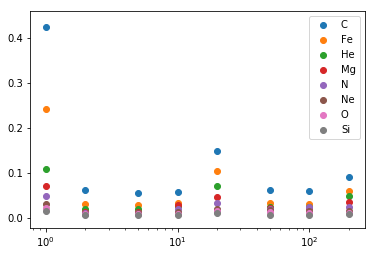

In [548]:
for e,el in enumerate(els):
    plt.scatter(n_stars,err_sds[e],label=r'%s'%el)
plt.xscale('log');
plt.legend();

In [549]:
np.asarray(all_Errs[0]).shape

(200, 16000, 8)

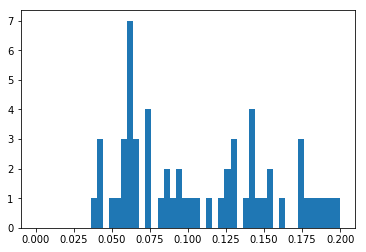

In [550]:
plt.hist([np.std(all_Errs[0][i][:,0]) for i in range(200)],bins=50,range=[0,0.2]);

In [1017]:
all_Errs=dat.f.Errors

In [1018]:
this_Errors[0].shape

(16000, 8)

In [1019]:
for this_n in [1,10,100]:
    ind = np.where(this_n==n_stars)[0][0]
    this_Errors = all_Errs[ind]
    medians = np.asarray([np.median(thisL,axis=0) for thisL in this_Errors])
    lows = np.asarray([np.percentile(thisL,15.865,axis=0) for thisL in this_Errors])
    highs = np.asarray([np.percentile(thisL,100.-15.865,axis=0) for thisL in this_Errors])
    for i in [1,0,4]:
        med = np.median(medians[:,i])
        up = np.median(highs[:,i])
        lo = np.median(lows[:,i])
        if i==1:
            print("$%d$ &"%this_n)
        print(" $%.3f$ & $^{+%.3f}_{-%.3f}$"%(med,up-med,med-lo))
        if i==4:
            print(" \\\\")
        else:
            print("&")

$1$ &
 $0.009$ & $^{+0.022}_{-0.007}$
&
 $0.009$ & $^{+0.021}_{-0.007}$
&
 $0.009$ & $^{+0.024}_{-0.007}$
 \\
$10$ &
 $0.020$ & $^{+0.072}_{-0.016}$
&
 $0.009$ & $^{+0.017}_{-0.007}$
&
 $0.008$ & $^{+0.014}_{-0.006}$
 \\
$100$ &
 $0.217$ & $^{+0.022}_{-0.021}$
&
 $0.017$ & $^{+0.010}_{-0.010}$
&
 $0.005$ & $^{+0.007}_{-0.004}$
 \\


In [1002]:
els

['C', 'Fe', 'He', 'Mg', 'N', 'Ne', 'O', 'Si']

In [1023]:
from scipy.stats import halfcauchy

rvs = halfcauchy.rvs(scale=0.01,size=100000)

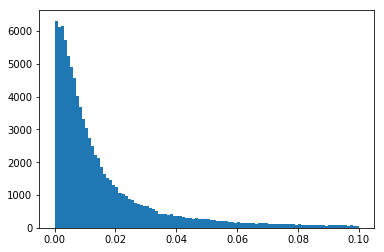

In [1028]:
plt.hist(rvs,bins=100,range=[0.,0.1]);

In [1034]:
p=np.percentile(rvs,[15.865,50.,100-15.865])
print("$%.3f_{-%.3f}^{+%.3f}$"%(p[1],p[1]-p[0],p[2]-p[1]))

$0.010_{-0.007}^{+0.030}$


In [551]:
d=[]
for i in range(200):
    d.append(np.std(all_Errs[0][i][:,0]))
np.median(d)

0.42540249976351996

In [552]:
all_Errs[0][0][:,0].shape

(16000,)

1 0.06107527029583303
2 0.032731883209024606
5 0.025383415270785227
10 0.02459078844838421
20 0.02129183931655879
50 0.014912416973535753
100 0.010486804409470581
200 0.006932945803546057


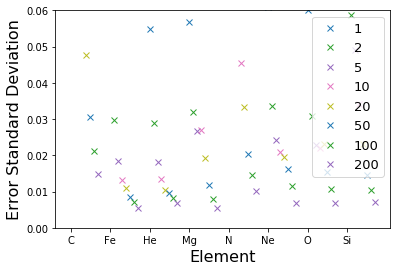

In [553]:
for n_index in range(len(n_stars)):
    these_Errs = all_Errs[n_index]
    med_sds = np.median([np.std(Er,axis=0) for Er in these_Errs],axis=0)
    print(n_stars[n_index],np.median(med_sds))
    #these_Errs=np.mean(all_Errs[n_index],axis=0)
    #np.std(these_Errs,axis=0)
    plt.errorbar(np.arange(len(els))+float(n_index)/10.,med_sds,marker='x',ls='',label='%d'%n_stars[n_index])
    plt.errorbar(els,-1.)
    plt.ylim([0.,0.06])
    plt.ylabel('Error Standard Deviation',fontsize=FS);plt.xlabel('Element',fontsize=FS);
    plt.legend(fontsize=FS-3);

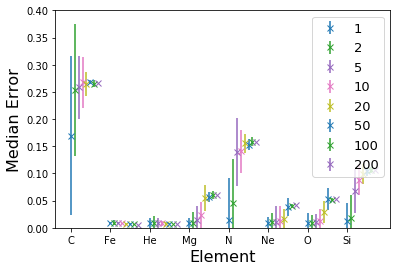

In [556]:
for n_index in range(len(n_stars)):
    these_Errs = all_Errs[n_index]
    med_meds = np.median([np.median(Er,axis=0) for Er in these_Errs],axis=0)
    sd_meds = np.std([np.median(Er,axis=0) for Er in these_Errs],axis=0)
    #these_Errs=np.mean(all_Errs[n_index],axis=0)
    #plt.errorbar(np.arange(len(els))+float(n_index)/10.,np.median(these_Errs,axis=0),marker='x',ls='',label='%d'%n_stars[n_index])
    plt.errorbar(np.arange(len(els))+float(n_index)/10.,med_meds,yerr=sd_meds,marker='x',ls='',label='%d'%n_stars[n_index])
    plt.errorbar(els,-1.)
    plt.ylim([0.,0.4])
    plt.ylabel('Median Error',fontsize=FS);plt.xlabel('Element',fontsize=FS);
    plt.legend(fontsize=FS-3);